In [87]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 40
import numpy as np
import os,random, math
from tqdm import tqdm
from copy import deepcopy
from collections import Counter

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# from dataprep.eda import plot, plot_correlation, plot_missing

# Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [88]:
import os
path = os.path.dirname(os.getcwd())
path = os.path.join(path, "ProcessedData")
train = pd.read_csv(os.path.join(path,"merged_train.csv"))
test = pd.read_csv(os.path.join(path,"merged_test.csv"))

In [89]:
danji = train[["단지코드","단지내주차면수","등록차량수"]].drop_duplicates().reset_index(drop=True)
danji

,단지코드,단지내주차면수,등록차량수
0,C2515,624.0000,205.0000
1,C1407,"1,285.0000","1,064.0000"
2,C1945,734.0000,730.0000
3,C1470,645.0000,553.0000
4,C1898,517.0000,415.0000
...,...,...,...
409,C2586,66.0000,57.0000
410,C2035,521.0000,246.0000
411,C2020,25.0000,19.0000
412,C2437,30.0000,16.0000


In [90]:
danji.describe()

,단지내주차면수,등록차량수
count,414.0000,414.0000
mean,586.3309,570.1039
std,363.6656,391.5858
min,13.0000,13.0000
25%,318.2500,289.2500
50%,517.0000,505.0000
75%,785.7500,760.0000
max,"1,798.0000","2,550.0000"


In [117]:
danjis = danji.sort_values(by="단지내주차면수").reset_index(drop=True)
pd.set_option('display.max_rows', None)
danjis

,단지코드,단지내주차면수,등록차량수,총세대수,세대수별주차면수
0,C2059,13.0000,13.0000,26,0.5000
1,C2020,25.0000,19.0000,40,0.6250
2,C1316,27.0000,22.0000,107,0.2523
3,C2437,30.0000,16.0000,90,0.3333
4,C2237,50.0000,55.0000,70,0.7143
5,C2536,54.0000,47.0000,72,0.7500
6,C1207,54.0000,59.0000,100,0.5400
7,C1803,57.0000,78.0000,100,0.5700
8,C2571,65.0000,62.0000,481,0.1351
9,C2586,66.0000,57.0000,90,0.7333


In [92]:
from sklearn.metrics import mean_squared_error

In [93]:
ee = []
for idx,i in enumerate (danjis.단지내주차면수):
    ee.append(np.var(danjis.loc[:idx,"등록차량수"])*idx+ np.var(danjis.loc[idx:,"등록차량수"])*(len(danjis)-idx))
    
    
    
    

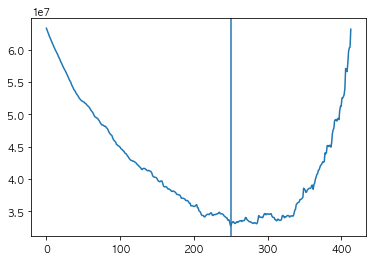

In [94]:
plt.plot(ee)
plt.axvline(x=np.argmin(ee))
plt.show()

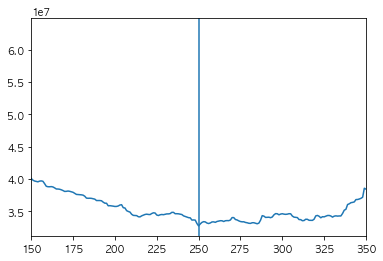

In [95]:
plt.plot(ee)
plt.axvline(x=np.argmin(ee))
plt.xlim([150,350])
plt.show()

In [96]:
danjis.단지내주차면수[np.argmin(ee)]

629.0

In [116]:
ee[250:300]
ee.index(33053884.37708304)

285

index: 722

In [98]:
danjis1 = danji[:285]
danjis2 = danji[285:]

In [ ]:
danji

In [119]:
len(danjis1), len(danjis2)

(190, 224)

In [124]:
danjis

,단지코드,단지내주차면수,등록차량수,총세대수,세대수별주차면수
0,C2059,13.0000,13.0000,26,0.5000
1,C2020,25.0000,19.0000,40,0.6250
2,C1316,27.0000,22.0000,107,0.2523
3,C2437,30.0000,16.0000,90,0.3333
4,C2237,50.0000,55.0000,70,0.7143
5,C2536,54.0000,47.0000,72,0.7500
6,C1207,54.0000,59.0000,100,0.5400
7,C1803,57.0000,78.0000,100,0.5700
8,C2571,65.0000,62.0000,481,0.1351
9,C2586,66.0000,57.0000,90,0.7333


In [123]:
danjis[danjis.단지내주차면수 <722].shape, danjis[danjis.단지내주차면수 >=722].shape

((285, 5), (129, 5))

In [120]:
danjis.단지내주차면수[285]

722.0

In [111]:
len(danji)

414

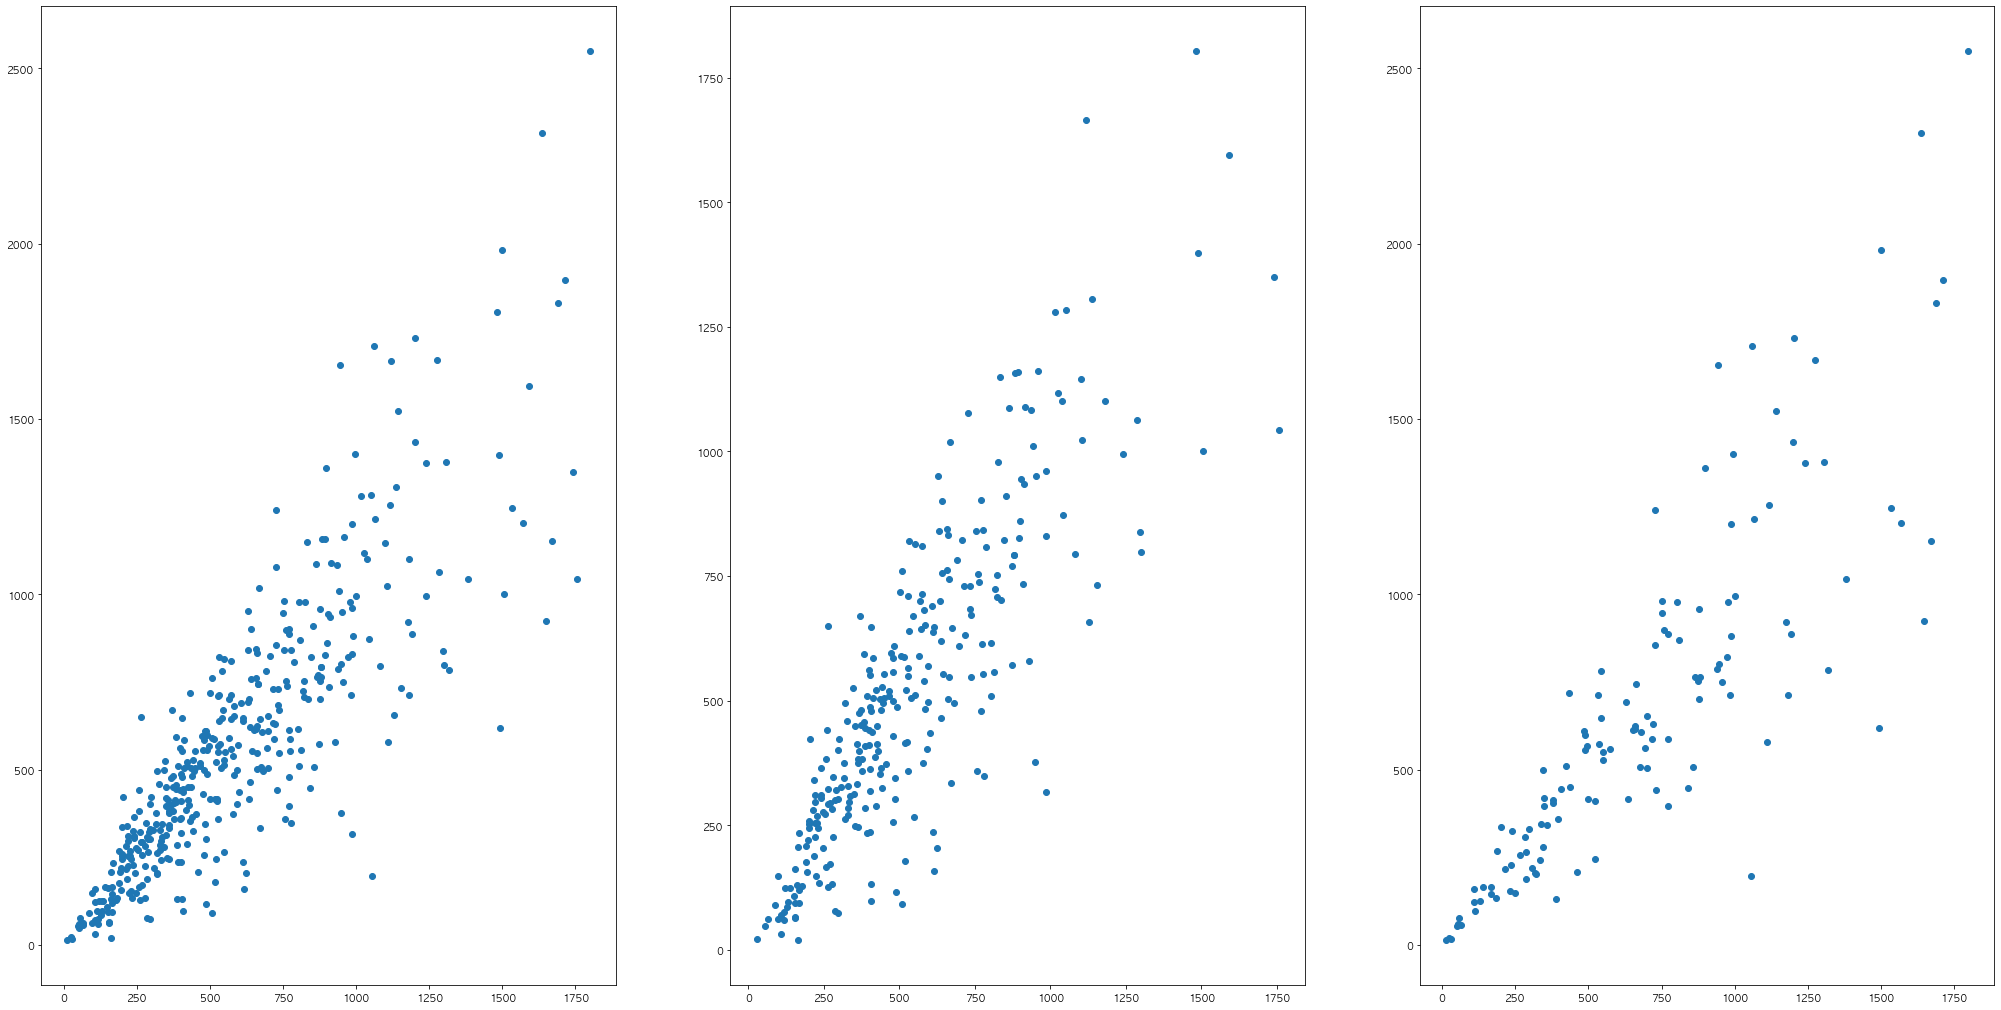

In [99]:
fig= plt.figure(figsize=(35,18))
plt.subplot(1,3,1)
plt.scatter(danjis.단지내주차면수,danjis.등록차량수)
plt.subplot(1,3,2)
plt.scatter(danjis1.단지내주차면수,danjis1.등록차량수)
plt.subplot(1,3,3)
plt.scatter(danjis2.단지내주차면수,danjis2.등록차량수)
plt.show()

No handles with labels found to put in legend.


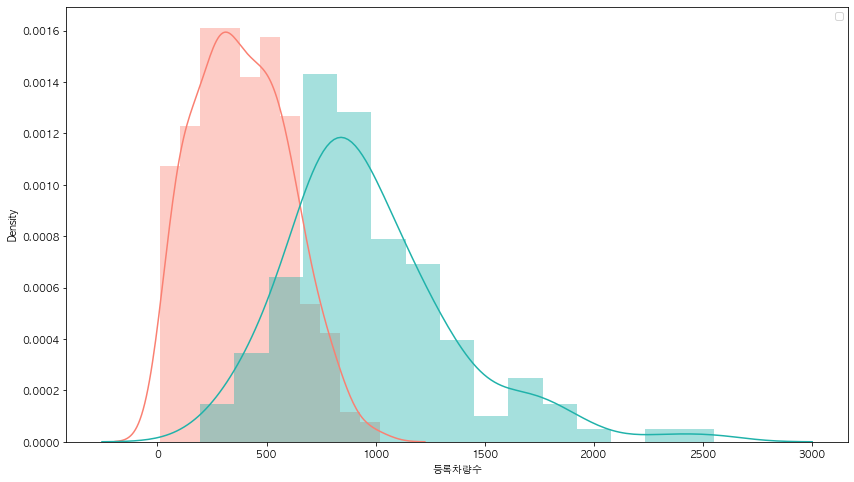

In [101]:
plt.rcParams["figure.figsize"] = (14,8)
sns.distplot(danjis.등록차량수[danjis.단지내주차면수<danjis.단지내주차면수[285]], color="salmon")
sns.distplot(danjis.등록차량수[danjis.단지내주차면수>=danjis.단지내주차면수[285]], color="lightseagreen")
plt.legend()
plt.show()

In [ ]:
train[[]]

In [110]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역', '버스정류장', '단지내주차면수', '등록차량수', '단지명',
       '도로명주소', '연면적', '위도', '경도', 'subway_name', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율'],
      dtype='object')

## MODELING 전 EDA 좀더 

In [ ]:
plt.figure(figsize=(16,60))
for i,r in enumerate(['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료', '지하철역',
       '버스정류장', '단지내주차면수', '등록차량수', '연면적', '위도', '경도', 'subway_dist', '환승역 수',
       '총인구수', '세대당_인구', '남/여비율', '남/여_0~19세', '남/여_20~39세', '남/여_40~69세',
       '남/여_70세이상', '0~19세_비율', '20~39세_비율', '40~69세_비율', '70세이상_비율', 
       '전용면적_std', '전용면적별세대수_std', '임대보증금_std', '임대료_std',"단지내주차면수/연면적","임대보증금/임대료"]):
    plt.subplot(24,3,i+1)
    sns.boxplot(train.temp, train[r])
    plt.title(r)